In [1]:
from transformers import BertForSequenceClassification, BertTokenizerFast, pipeline
from utils.data_utils import read_data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_dataset, test_dataset, dev_dataset = read_data("../data/all/combined_lfud_huggingface_nonfallacies.csv")
# train_dataset, test_dataset, dev_dataset = read_data("../data/all/combined_lfud_huggingface_binary.csv")

In [2]:
# model_path = "../model/outputs/21-02-2025_14-45-55_bert-2-classes-model.pickle" 
# model_path = "../model/outputs/03-03-2025_16-23-08_bert-3-classes-model.pickle"
model_path = "../model/outputs/03-03-2025_16-46-39_bert-5-classes-model.pickle" 
# model_path = "../model/outputs/20-02-2025_10-26-38_bert-all-classes-model.pickle" 

model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizerFast.from_pretrained(model_path)
nlp = pipeline("text-classification", model=model, tokenizer=tokenizer)

In [3]:
# logical_fallacies = ['nonfallacy', 'fallacy']
# logical_fallacies = ['nonfallacy', 'faulty generalization', 'intentional']
logical_fallacies = ['nonfallacy', 'faulty generalization', 'intentional', 'ad hominem', 'false causality']
# logical_fallacies = list(set(list(test_dataset['logical_fallacies'])))
filtered_test_data = test_dataset[test_dataset.logical_fallacies.isin(logical_fallacies)]
filtered_test_data

,logical_fallacies,source_article_ro
4280,faulty generalization,"„Dacă nu obții un A la clasa domnului K, vei p..."
4281,false causality,"De fiecare dată când port acest colier, îmi pr..."
4285,nonfallacy,O jucărie este ceva cu care să te joci
4289,nonfallacy,Tulsidas (1541-1623) a fost un scriitor indian
4290,nonfallacy,Ayurveda () este un sistem de medicină alterna...
...,...,...
5126,false causality,Copiii care joacă jocuri video violente acțion...
5127,nonfallacy,Haflinger este o rasă universală de cai
5128,intentional,"„Taxele pe carbon sunt otravă politică, deoare..."
5131,intentional,Poate cercetarea climatică să revină pe drumul...


In [4]:
filtered_test_data["logical_fallacies"].value_counts()

logical_fallacies
nonfallacy               173
faulty generalization     89
intentional               73
ad hominem                70
false causality           67
Name: count, dtype: int64

In [5]:
predictions = []
for data in filtered_test_data["source_article_ro"]:
    predictions.append(nlp(data)[0]["label"])

In [28]:
report = classification_report(filtered_test_data["logical_fallacies"], predictions)
accuracy = accuracy_score(filtered_test_data["logical_fallacies"], predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8050847457627118
Classification Report:
                        precision    recall  f1-score   support

           ad hominem       0.82      0.76      0.79        70
      false causality       0.92      0.49      0.64        67
faulty generalization       0.63      0.85      0.72        89
          intentional       0.60      0.62      0.61        73
           nonfallacy       0.99      1.00      0.99       173

             accuracy                           0.81       472
            macro avg       0.79      0.74      0.75       472
         weighted avg       0.82      0.81      0.80       472



In [29]:
import numpy as np

y_true = np.array(filtered_test_data["logical_fallacies"])
y_pred = np.array(predictions)

classes = np.unique(y_true) 

for cls in classes:
    cls_mask = (y_true == cls)
    cls_correct = (y_true[cls_mask] == y_pred[cls_mask])
    cls_accuracy = cls_correct.sum() / cls_mask.sum()
    print(f"Class {cls} Accuracy: {cls_accuracy:.2f}")


Class ad hominem Accuracy: 0.76
Class false causality Accuracy: 0.49
Class faulty generalization Accuracy: 0.85
Class intentional Accuracy: 0.62
Class nonfallacy Accuracy: 1.00


Confusion Matrix

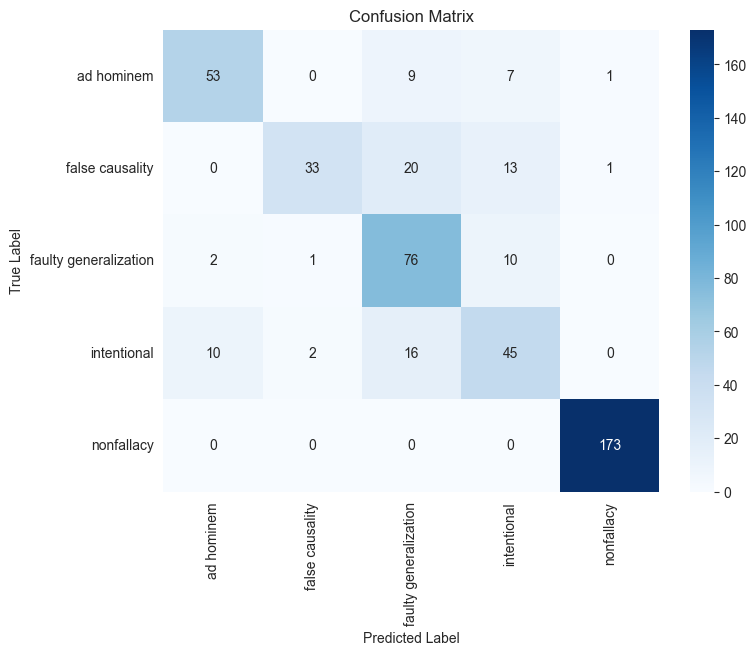

In [30]:
class_labels = sorted(logical_fallacies)  # Ensure consistent ordering

cm = confusion_matrix(filtered_test_data["logical_fallacies"], predictions, labels=class_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
